In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'large',
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
pylab.rcParams.update(params)
%matplotlib inline


def prior_C_equals_1(x_v, x_a, params):
    sigma_squared_sum = (params.sigma_v ** 2 * params.sigma_a ** 2
                         + params.sigma_v ** 2 * params.sigma_p ** 2
                         + params.sigma_a ** 2 * params.sigma_p ** 2)

    prefactor = 1. / (2 * np.pi * np.sqrt(sigma_squared_sum))

    exponent = -1. / 2 * (np.power(x_v - x_a, 2) * params.sigma_p ** 2
                          + np.power(x_v - params.mu_p, 2) * params.sigma_a ** 2
                          + np.power(x_a - params.mu_p, 2) * params.sigma_v ** 2) \
               / sigma_squared_sum
    return prefactor * np.exp(exponent)


def prior_C_equals_2(x_v, x_a, params):
    prefactor = 1. / (
        2 * np.pi * np.sqrt((params.sigma_v ** 2 + params.sigma_p ** 2) * (params.sigma_a ** 2 + params.sigma_p ** 2)))
    exponent = -1. / 2 * ((np.power(x_v - params.mu_p, 2) / (params.sigma_v ** 2 + params.sigma_p ** 2)
                           + np.power(x_a - params.mu_p, 2) / (params.sigma_a ** 2 + params.sigma_p ** 2)))
    return prefactor * np.exp(exponent)


def posterior_C_equals_1(x_v, x_a, params):
    return prior_C_equals_1(x_v, x_a, params) * params.p_common / \
           (prior_C_equals_1(x_v, x_a, params) * params.p_common
            + prior_C_equals_2(x_v, x_a, params) * (1 - params.p_common))

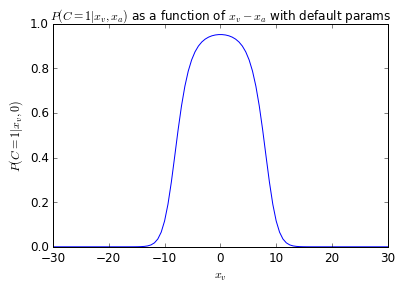

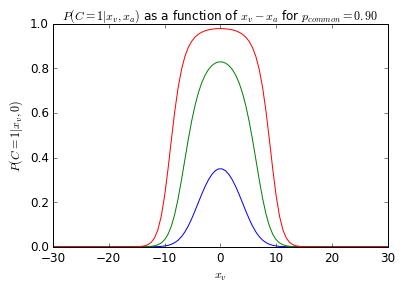

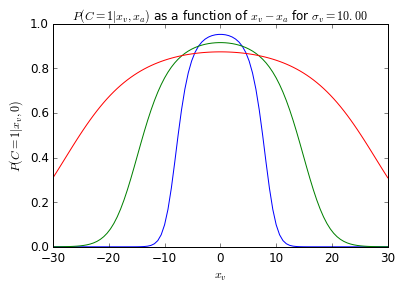

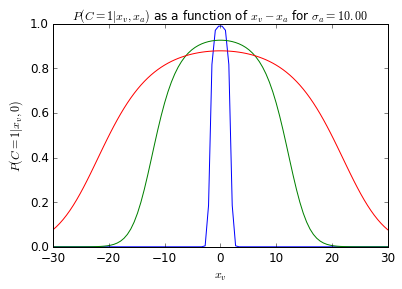

/Users/erens/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:37: RuntimeWarning: invalid value encountered in double_scalars


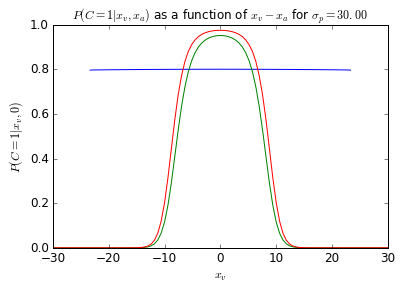

In [2]:
params = lambda: None
params.p_common = 0.8
params.sigma_v = 0.6
params.sigma_a = 3.1
params.sigma_p = 15
params.mu_p = 0

# --------------

x_a = 0
x_vs = np.linspace(-30,30,100)
probs = np.zeros_like(x_vs)
for i, x_v in enumerate(x_vs):
    probs[i] = posterior_C_equals_1(x_v, x_a, params)
    
plt.plot(x_vs, probs)
plt.xlabel('$x_v$')
plt.ylabel('$P(C=1 | x_v, 0)$')
plt.title('$P(C=1 | x_v, x_a)$ as a function of $x_v - x_a$ with default params')
plt.show()

#----------------
p_commons = np.linspace(0.1,0.9,3)
for p_common in p_commons:
    params.p_common = p_common
    probs = np.zeros_like(x_vs)
    for i, x_v in enumerate(x_vs):
        probs[i] = posterior_C_equals_1(x_v, x_a, params)

    plt.plot(x_vs, probs)
    plt.xlabel('$x_v$')
    plt.ylabel('$P(C=1 | x_v, 0)$')
    plt.title('$P(C=1 | x_v, x_a)$ as a function of $x_v - x_a$ for $p_{{common}}={0:.2f}$'.format(p_common))
plt.show()

params.p_common = 0.8
#----------------

sigma_vs = np.linspace(0.1,10,3)
for sigma_v in sigma_vs:
    params.sigma_v = sigma_v
    probs = np.zeros_like(x_vs)
    for i, x_v in enumerate(x_vs):
        probs[i] = posterior_C_equals_1(x_v, x_a, params)

    plt.plot(x_vs, probs)
    plt.xlabel('$x_v$')
    plt.ylabel('$P(C=1 | x_v, 0)$')
    plt.title('$P(C=1 | x_v, x_a)$ as a function of $x_v - x_a$ for $\sigma_{{v}}={0:.2f}$'.format(sigma_v))
plt.show()
params.sigma_v = 0.6

#----------------

sigma_as = np.linspace(0.1,10,3)
for sigma_a in sigma_as:
    params.sigma_a = sigma_a
    probs = np.zeros_like(x_vs)
    for i, x_v in enumerate(x_vs):
        probs[i] = posterior_C_equals_1(x_v, x_a, params)

    plt.plot(x_vs, probs)
    plt.xlabel('$x_v$')
    plt.ylabel('$P(C=1 | x_v, 0)$')
    plt.title('$P(C=1 | x_v, x_a)$ as a function of $x_v - x_a$ for $\sigma_{{a}}={0:.2f}$'.format(sigma_a))
plt.show()
params.sigma_a = 3.1

#----------------

sigma_ps = np.linspace(0.1,30,3)
for sigma_p in sigma_ps:
    params.sigma_p = sigma_p
    probs = np.zeros_like(x_vs)
    for i, x_v in enumerate(x_vs):
        probs[i] = posterior_C_equals_1(x_v, x_a, params)

    plt.plot(x_vs, probs)
    plt.xlabel('$x_v$')
    plt.ylabel('$P(C=1 | x_v, 0)$')
    plt.title('$P(C=1 | x_v, x_a)$ as a function of $x_v - x_a$ for $\sigma_{{p}}={0:.2f}$'.format(sigma_p))
plt.show()
params.sigma_p = 15


$p_{common}$ does this bla bla

In [3]:
def estimated_s_v_when_C_equals_2(x_v, params):
    return (x_v / params.sigma_v * 2 + params.mu_p / params.sigma_p ** 2) / \
           (1. / params.sigma_v ** 2 + 1. / params.sigma_p ** 2)


def estimated_s_a_when_C_equals_2(x_a, params):
    return (x_a / params.sigma_a * 2 + params.mu_p / params.sigma_p ** 2) / \
           (1. / params.sigma_a ** 2 + 1. / params.sigma_p ** 2)


def estimated_s_when_C_equals_1(x_a, x_v, params):
    return (x_a / params.sigma_a * 2 + x_v / params.sigma_v * 2 + params.mu_p / params.sigma_p ** 2) / \
           (1. / params.sigma_a ** 2 + 1. / params.sigma_v ** 2 + 1. / params.sigma_p ** 2)


def estimated_s_v(x_v, x_a, params):
    return posterior_C_equals_1(x_v, x_a, params) * estimated_s_when_C_equals_1(x_a, x_v, params) + \
           (1 - posterior_C_equals_1(x_v, x_a, params)) * estimated_s_v_when_C_equals_2(x_v, params)


def estimated_s_a(x_v, x_a, params):
    return posterior_C_equals_1(x_v, x_a, params) * estimated_s_when_C_equals_1(x_a, x_v, params) + \
           (1 - posterior_C_equals_1(x_v, x_a, params)) * estimated_s_a_when_C_equals_2(x_a, params)


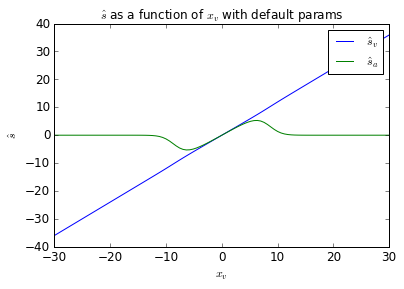

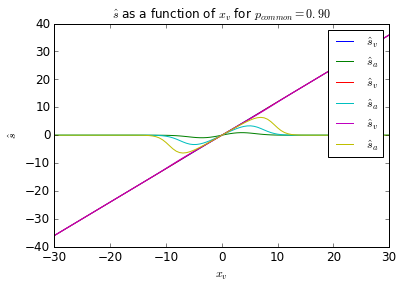

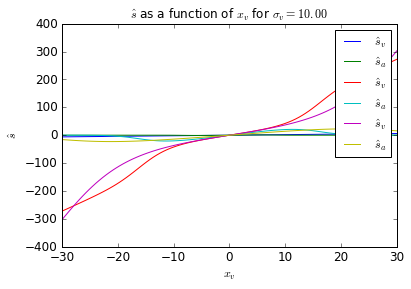

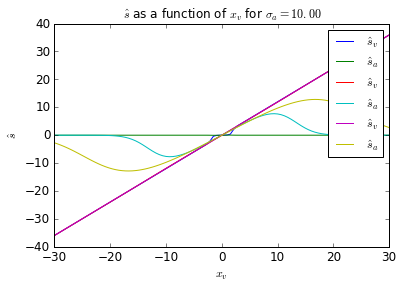

/Users/erens/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:37: RuntimeWarning: invalid value encountered in double_scalars


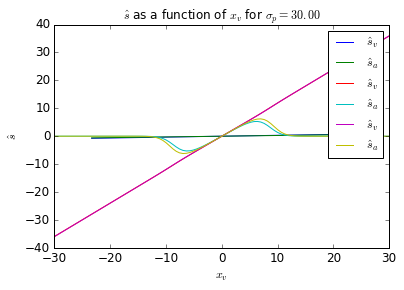

In [4]:
params = lambda: None
params.p_common = 0.8
params.sigma_v = 0.6
params.sigma_a = 3.1
params.sigma_p = 15
params.mu_p = 0

# --------------

x_a = 0
x_vs = np.linspace(-30,30,100)
estimated_s_vs = np.zeros_like(x_vs)
estimated_s_as = np.zeros_like(x_vs)
for i, x_v in enumerate(x_vs):
    estimated_s_vs[i] = estimated_s_v(x_v, x_a, params)
    estimated_s_as[i] = estimated_s_a(x_v, x_a, params)
    
plt.plot(x_vs, estimated_s_vs, label='$\hat{s}_v$')
plt.plot(x_vs, estimated_s_as, label='$\hat{s}_a$')
plt.xlabel('$x_v$')
plt.ylabel('$\hat{s}$')
plt.title('$\hat{s}$ as a function of $x_v$ with default params')
plt.legend()
plt.show()

#----------------
p_commons = np.linspace(0.1,0.9,3)
for p_common in p_commons:
    params.p_common = p_common
    estimated_s_vs = np.zeros_like(x_vs)
    estimated_s_as = np.zeros_like(x_vs)
    for i, x_v in enumerate(x_vs):
        estimated_s_vs[i] = estimated_s_v(x_v, x_a, params)
        estimated_s_as[i] = estimated_s_a(x_v, x_a, params)

    plt.plot(x_vs, estimated_s_vs, label='$\hat{s}_v$')
    plt.plot(x_vs, estimated_s_as, label='$\hat{s}_a$')
    plt.xlabel('$x_v$')
    plt.ylabel('$\hat{s}$')
    plt.title('$\hat{{s}}$ as a function of $x_v$ for $p_{{common}}={0:.2f}$'.format(p_common))
    plt.legend()
plt.show()

params.p_common = 0.8
# #----------------

sigma_vs = np.linspace(0.1,10,3)
for sigma_v in sigma_vs:
    params.sigma_v = sigma_v
    estimated_s_vs = np.zeros_like(x_vs)
    estimated_s_as = np.zeros_like(x_vs)
    for i, x_v in enumerate(x_vs):
        estimated_s_vs[i] = estimated_s_v(x_v, x_a, params)
        estimated_s_as[i] = estimated_s_a(x_v, x_a, params)

    plt.plot(x_vs, estimated_s_vs, label='$\hat{s}_v$')
    plt.plot(x_vs, estimated_s_as, label='$\hat{s}_a$')
    plt.xlabel('$x_v$')
    plt.ylabel('$\hat{s}$')
    plt.title('$\hat{{s}}$ as a function of $x_v$ for $\sigma_{{v}}={0:.2f}$'.format(sigma_v))
    plt.legend()
plt.show()
params.sigma_v = 0.6

# #----------------

sigma_as = np.linspace(0.1,10,3)
for sigma_a in sigma_as:
    params.sigma_a = sigma_a
    estimated_s_vs = np.zeros_like(x_vs)
    estimated_s_as = np.zeros_like(x_vs)
    for i, x_v in enumerate(x_vs):
        estimated_s_vs[i] = estimated_s_v(x_v, x_a, params)
        estimated_s_as[i] = estimated_s_a(x_v, x_a, params)

    plt.plot(x_vs, estimated_s_vs, label='$\hat{s}_v$')
    plt.plot(x_vs, estimated_s_as, label='$\hat{s}_a$')
    plt.xlabel('$x_v$')
    plt.ylabel('$\hat{s}$')
    plt.title('$\hat{{s}}$ as a function of $x_v$ for $\sigma_{{a}}={0:.2f}$'.format(sigma_a))
    plt.legend()
plt.show()
params.sigma_a = 3.1

# #----------------

sigma_ps = np.linspace(0.1,30,3)
for sigma_p in sigma_ps:
    params.sigma_p = sigma_p
    estimated_s_vs = np.zeros_like(x_vs)
    estimated_s_as = np.zeros_like(x_vs)
    for i, x_v in enumerate(x_vs):
        estimated_s_vs[i] = estimated_s_v(x_v, x_a, params)
        estimated_s_as[i] = estimated_s_a(x_v, x_a, params)

    plt.plot(x_vs, estimated_s_vs, label='$\hat{s}_v$')
    plt.plot(x_vs, estimated_s_as, label='$\hat{s}_a$')
    plt.xlabel('$x_v$')
    plt.ylabel('$\hat{s}$')
    plt.title('$\hat{{s}}$ as a function of $x_v$ for $\sigma_{{p}}={0:.2f}$'.format(sigma_p))
    plt.legend()
plt.show()
params.sigma_p = 15


### Part II

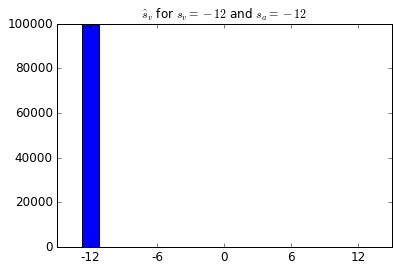

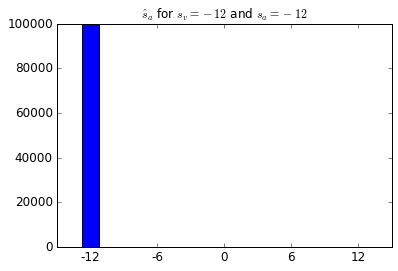

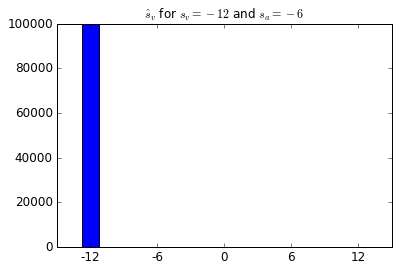

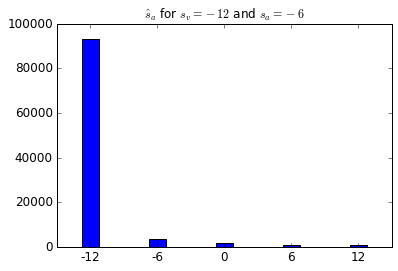

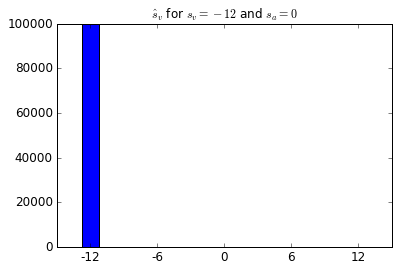

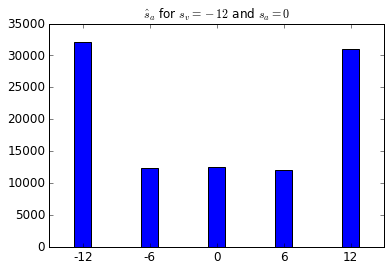

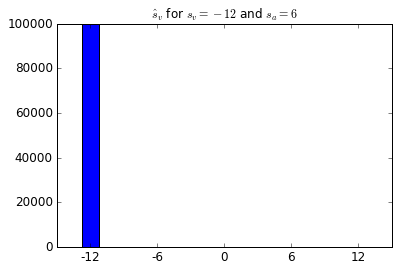

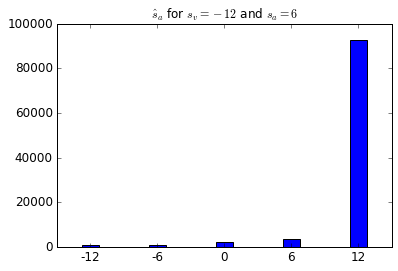

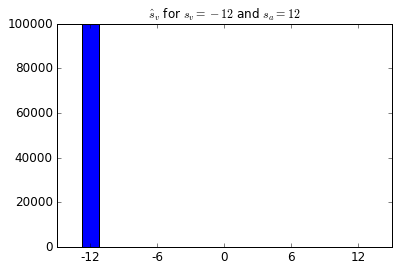

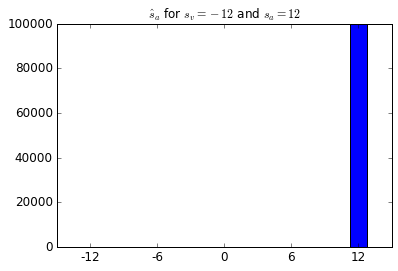

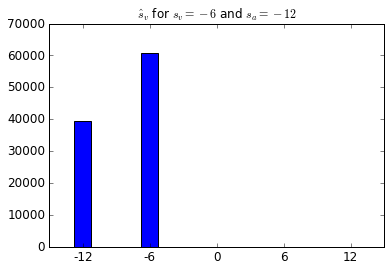

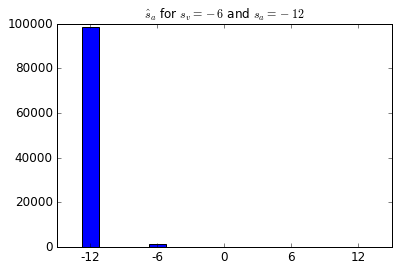

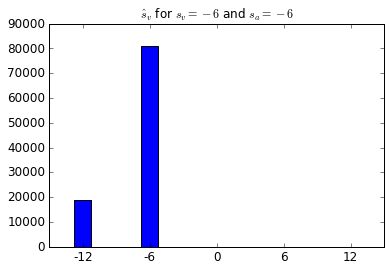

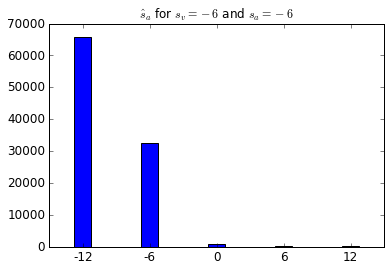

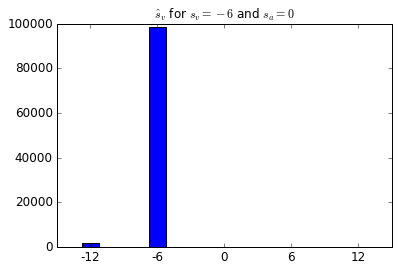

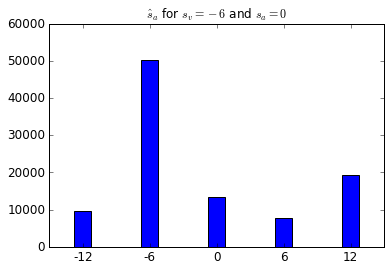

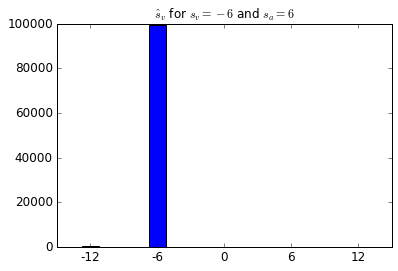

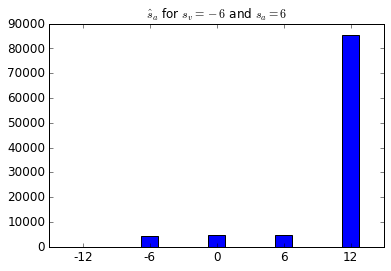

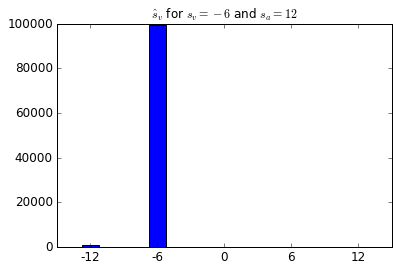

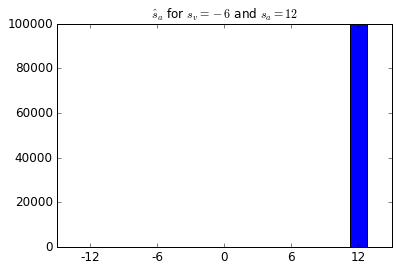

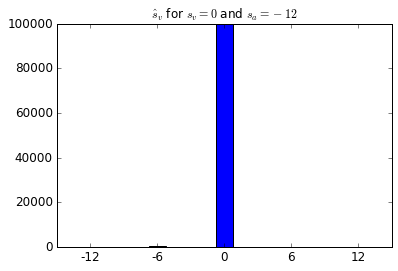

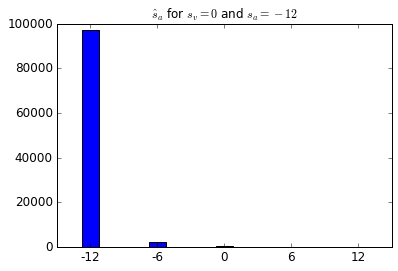

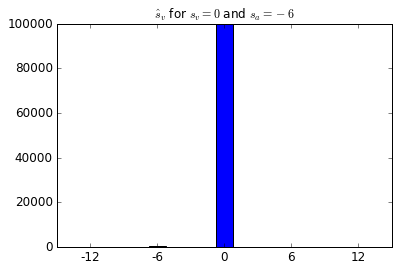

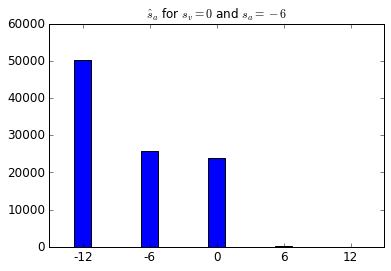

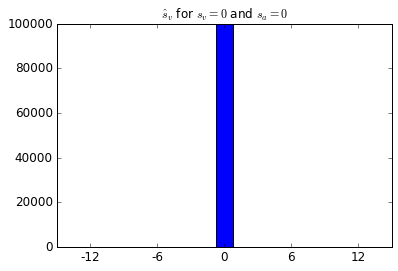

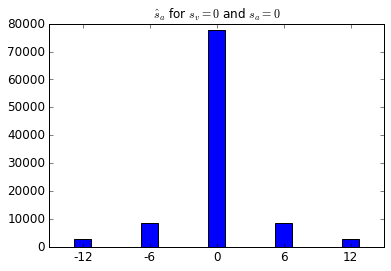

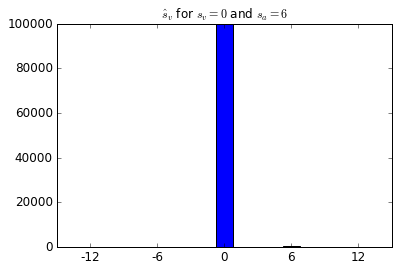

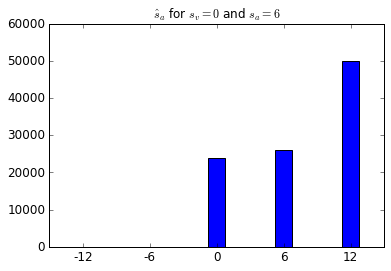

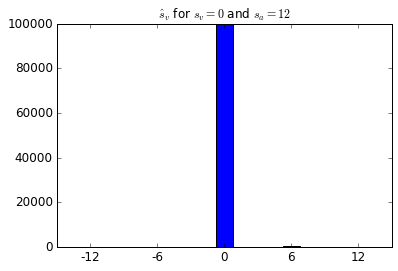

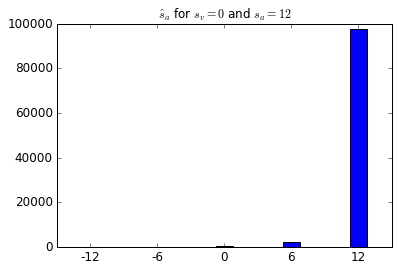

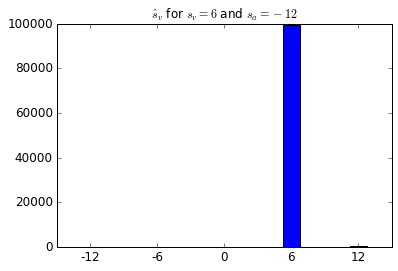

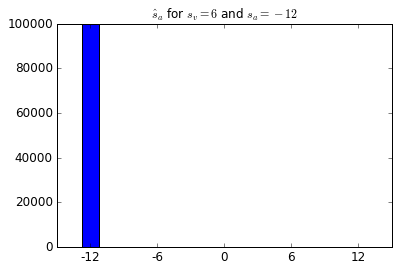

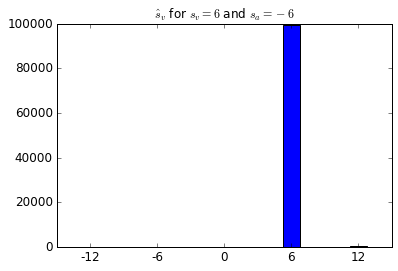

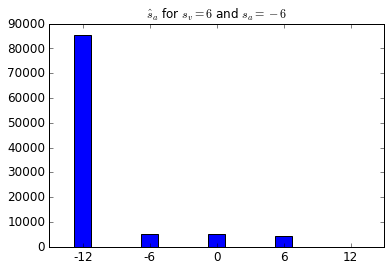

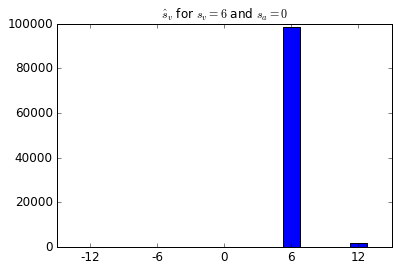

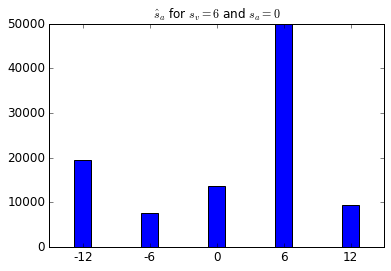

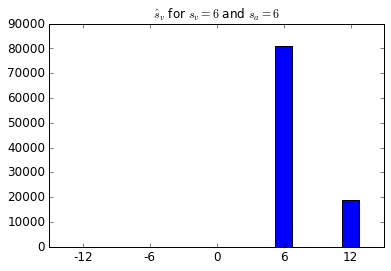

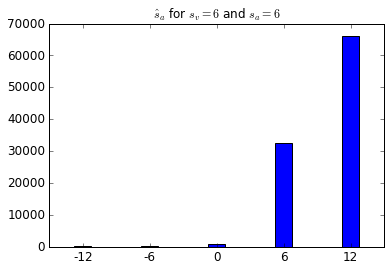

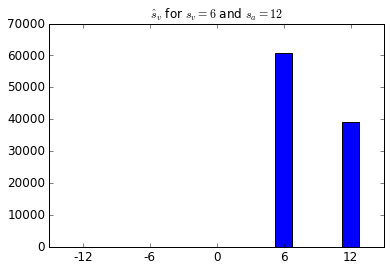

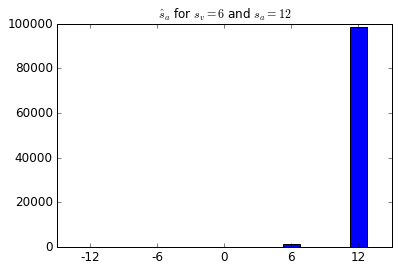

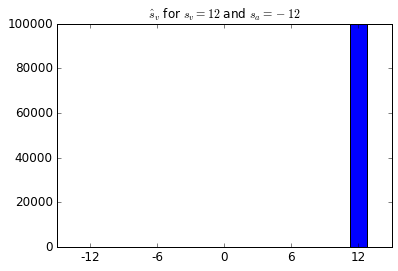

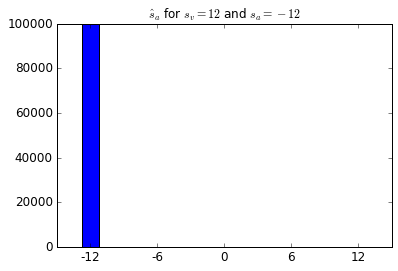

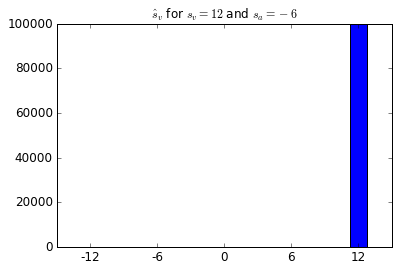

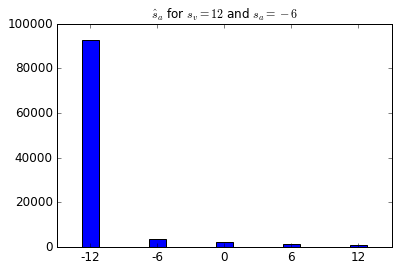

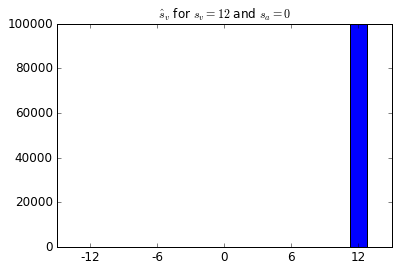

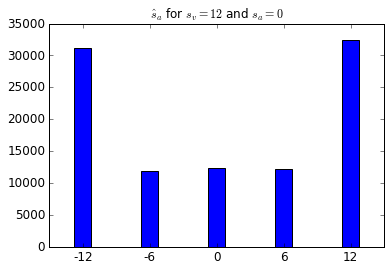

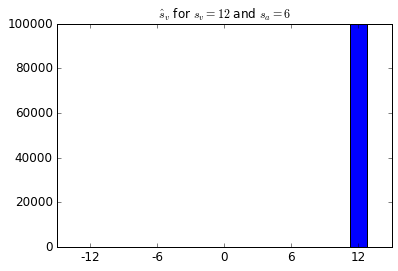

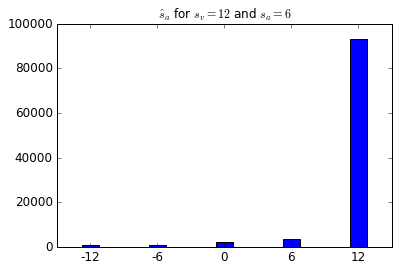

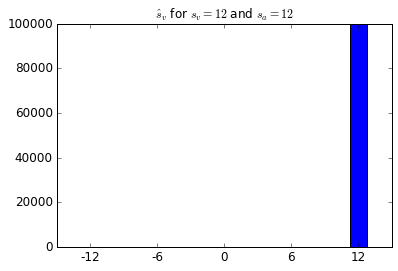

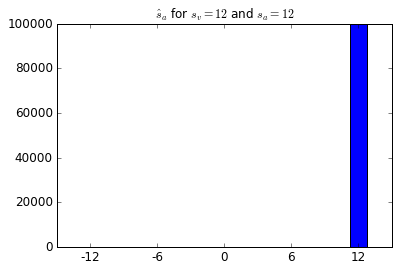

In [5]:
from itertools import product


N = int(1e5)

params = lambda: None
params.p_common = 0.8
params.sigma_v = 0.6
params.sigma_a = 3.1
params.sigma_p = 15
params.mu_p = 0

cs = np.sign(np.random.rand(N) - params.p_common) / 2. + 1.5  # only consists of 1s and 2s
is_class_1 = np.isclose(cs, 1.)
s_samples = np.random.normal(params.mu_p, params.sigma_p, (N, 2))

s_vs = s_samples[:, 0]

s_as = np.zeros((N,))
s_as[is_class_1] = s_samples[is_class_1, 0]
s_as[np.logical_not(is_class_1)] = s_samples[np.logical_not(is_class_1), 1]

# def make_button_presses(N, params):
#     s_set = [-12, -6, 0, 6, 12]
#     for s_v, s_a in product(s_set, s_set):
#         x_vs = np.random.normal(s_v, params.sigma_v, N)
#         x_as = np.random.normal(s_a, params.sigma_a, N)
#         estimated_s_vs = estimated_s_v(x_vs, x_as, params)
#         estimated_s_as = estimated_s_a(x_vs, x_as, params)
        
#         hist, bin_edges = np.histogram(estimated_s_vs, bins=[-np.inf, -9, -3, 3, 9, np.inf])
#         plt.bar(s_set, hist, width = 1.5, tick_label=s_set, align='center')
#         plt.title('$\hat{{s}}_v$ for $s_v={}$ and $s_a={}$'.format(s_v, s_a))
#         plt.show()  
        
#         hist, bin_edges = np.histogram(estimated_s_as, bins=[-np.inf, -9, -3, 3, 9, np.inf])
#         plt.bar(s_set, hist, width = 1.5, tick_label=s_set, align='center')
#         plt.title('$\hat{{s}}_a$ for $s_v={}$ and $s_a={}$'.format(s_v, s_a))
#         plt.show()  

# make_button_presses(N, params)

